# 3D Mean Transformation
Extracting useful information for 3D MRI scan to train efficient CNN models can be tricky. Why?
1. 3D CNN are difficult to train due to high computation times. And retraining models can be exhausting.
2. To train 3D CNN, amount of labelled-data required is very high and is not suitable if the sample size is small. 

To overcome these limitations, 2D CNNs are preferred over 3D CNNs as they are easier to train and comparatively, do not require large training dataset. However, training 2D CNNs can have it's own set of problems, such as:
1. How to convert 3D information into 2D? 
2. How to minimise the information loss during such transformations?

In this Jupyter notebook, we will be covering how to transform the 3D MRI into 2D using Mean Transformation. The transformation method is very simple and intuitive. **Take the mean of all the slices along each view, i.e., coronal, axial and sagittal.**

In [5]:
import nibabel as nb
import numpy as np
import matplotlib.pyplot as plt

# Load and Visualize

Nibabel python-package provides access to various neuroimaging analysis tools and interface to other popular tools such as AFNI and Freesurfer. Read more about Nibabel here: https://nipy.org/nibabel/gettingstarted.html 

In [11]:
# Load the .nii file using Nibabel
image = nb.load('/Kaggle/GM_Images/CN/mwp1ACK005_V1_t1_mprage_sag_p2_iso_TA_5_03_MPR_cor.nii')

# Transform the image in 3D-array format
image_data = image.get_fdata()

# Check the shape of 3D-MRI
print("The shape of 3D MRI is:",image_data.shape)

The shape of 3D MRI is: (113, 137, 113)


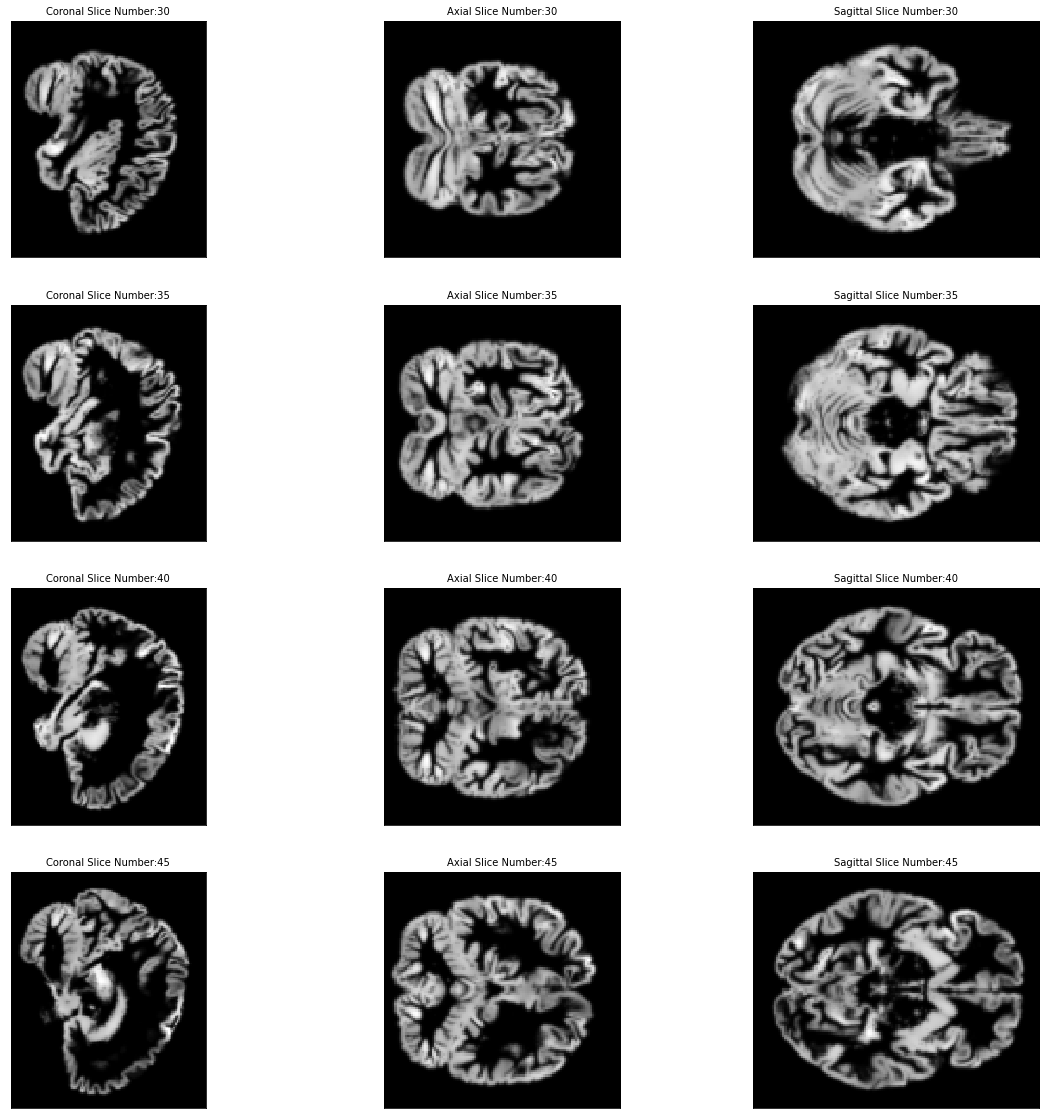

In [12]:
slices = []
start, end, step = (30,46,5)
for i in range(start, end, step):
    image_data = nb.load('/Kaggle/GM_Images/CN/mwp1ACK005_V1_t1_mprage_sag_p2_iso_TA_5_03_MPR_cor.nii').get_fdata()
    slices.append([image_data[i,:,:],image_data[:,i,:],image_data[:,:,i]])

slice_dict = {
    0 : "Coronal",
    1 : "Axial",
    2 : "Sagittal"
}
fig = plt.figure(figsize=(20, 20))
for i in range(len(slices)):
    slice_list = [slices[i][0], slices[i][1], slices[i][2]]
    for k, a in enumerate(slice_list):
        idx = ((i+1)*3)+ (k-2)
        ax = fig.add_subplot(len(slices),len(slice_list),idx)
        ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
        ax.set_title(f"{slice_dict[k]} Slice Number:{start+(5*i)}", fontsize=10)
        ax.set_xticks([])
        ax.set_yticks([])   

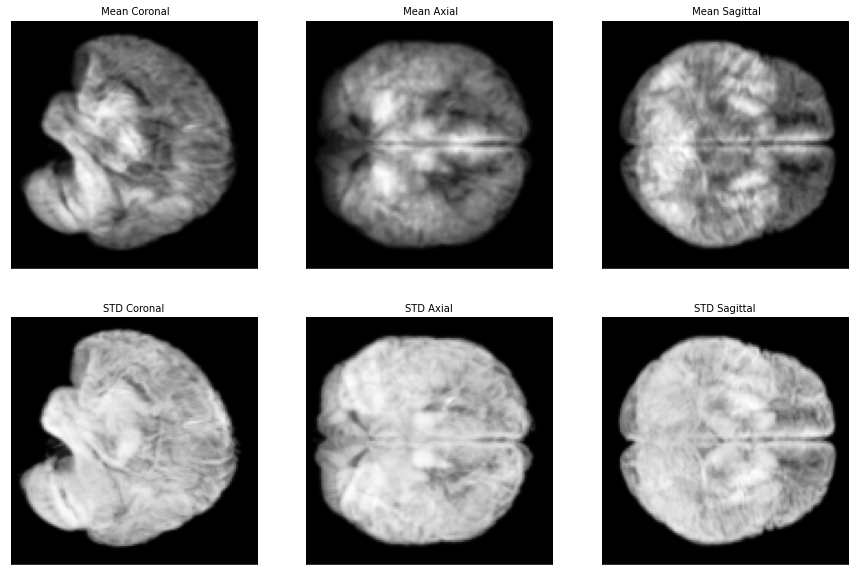

In [37]:
# Load the .nii file using Nibabel
image = nb.load('/Kaggle/GM_Images/CN/mwp1ACK005_V1_t1_mprage_sag_p2_iso_TA_5_03_MPR_cor.nii')

# Transform the image in 3D-array format
image_data = image.get_fdata()

slice_dict = {
    0 : "Coronal",
    1 : "Axial",
    2 : "Sagittal"
}

fig = plt.figure(figsize=(15, 10))
for k in range(3): 
    # Here, we take mean along all slices given the axis (i.e., 0,1,2 see the slice_dict)
    mean_image = np.mean(image_data,axis=k) 
    ax = fig.add_subplot(2,3,k+1)
    plt.imshow(mean_image, cmap='Greys_r', origin='lower', aspect='auto')
    ax.set_title(f" Mean {slice_dict[k]}", fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])

    std_image = np.std(image_data,axis=k)
    ax = fig.add_subplot(2,3,k+4)
    plt.imshow(std_image, cmap='Greys_r', origin='lower', aspect='auto')
    ax.set_title(f"STD {slice_dict[k]}", fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])
